In [15]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE  import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [17]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Hermite/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
    if config.diffusion == 0.1:
        diradd+= "LowNoise"
    elif config.diffusion == 10.:
        diradd += "HighNoise"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
hermite_dir += diradd+"/"

In [18]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "MSE" in f:
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")
    elif "est" in f:
        print(f)
        est =(np.load(hermite_dir+f, allow_pickle=True))
    elif "true" in f:
        true =(np.load(hermite_dir+f, allow_pickle=True))


Hermite_fQuadSinHF_DriftEvalExp_10240NPaths_3906e-03dT_Diff01_drift_est.npy


In [24]:
print(mse)

              0
index          
2      0.385438
3      0.385451
4      0.039914
5      0.039914
6      0.037077
7      0.037207
8      0.037503
9      0.037904
10     0.037811
11     0.037832
12     0.037554
13     0.037661
14     0.038254
15     0.037920
16     0.033350
17     0.034466
18     0.041053
19     0.041062
20     0.033197
21     0.044786
22     0.035724
23     0.035728
24     0.034129
25     0.035257
26     0.034892
27     0.034911
28     0.031110
29     0.022143
30     0.059795
31     0.075649
32     0.044489
33     0.044510
34     0.045094
35     0.912473
36     0.021755
37     0.031161
38     0.211769
39     0.029790
40     0.018914


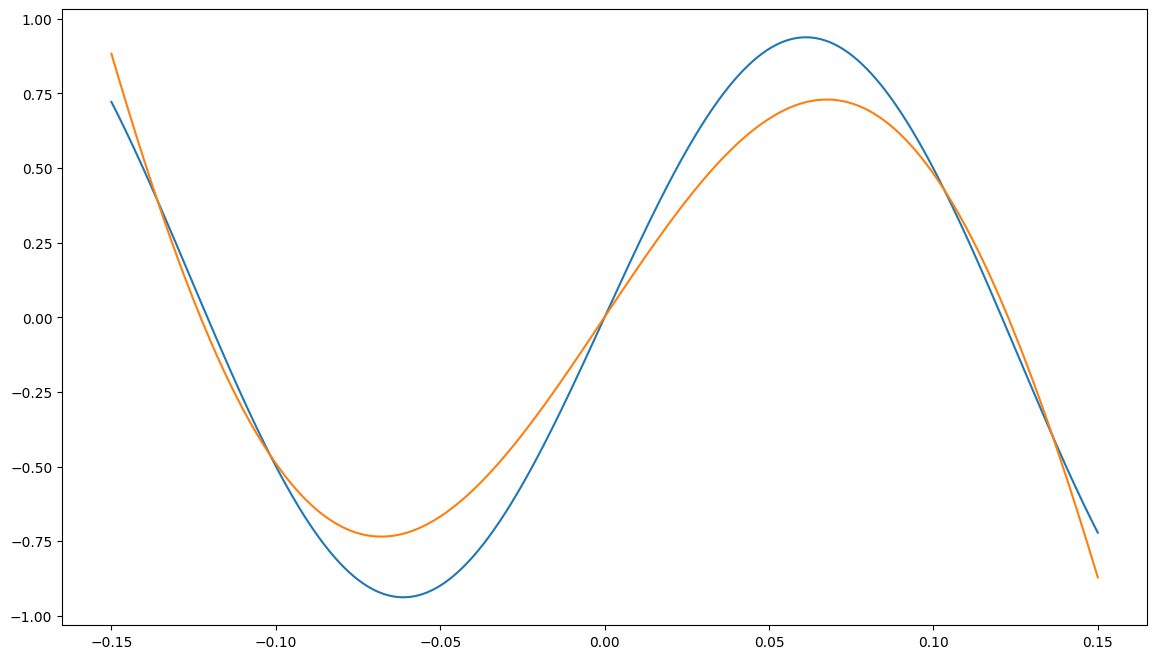

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
if config.diffusion == 10.:
    AN = -12
elif config.diffusion== 0.1:
    AN = -0.15
else:
    AN = -1.5
plt.plot(np.linspace(AN, -AN, 1024), true, label="true")
plt.plot(np.linspace(AN, -AN, 1024), est, label="est")
plt.show()

In [22]:
print

<function print>